     Sepal_length  Sepal_width  Petal_length  Petal_width             Type
69            5.6          2.5           3.9          1.1  Iris-versicolor
136           6.3          3.4           5.6          2.4   Iris-virginica
122           7.7          2.8           6.7          2.0   Iris-virginica
79            5.7          2.6           3.5          1.0  Iris-versicolor
134           6.1          2.6           5.6          1.4   Iris-virginica
['Iris-versicolor' 'Iris-virginica']
(100, 5)


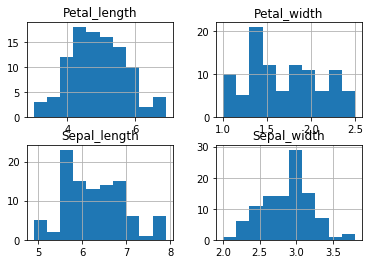

In [39]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Read in dataset
iris = pandas.read_csv("Iris.csv")
iris = iris[(iris.Type == 'Iris-versicolor') | (iris.Type == 'Iris-virginica')]

# shuffle rows
shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

print(iris.head())

# There are 3 species
print(iris.Type.unique())
iris.hist()
print(iris.shape)
plt.show()

In [40]:
iris["ones"] = np.ones(iris.shape[0])
X = iris[['ones', 'Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']].values
y = (iris.Type == 'Iris-versicolor').values.astype(int)

# The first observation
x0 = X[0]
print(X[0])
print(X[0].shape)
print('y',y.shape)

[1.  5.6 2.5 3.9 1.1]
(5,)
y (100,)


In [41]:
# Use a class for this model, it's good practice and condenses the code
class NNet3:
    def __init__(self, learning_rate=0.5, maxepochs=1e4, convergence_thres=1e-5, hidden_layer=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = 1e-5
        self.hidden_layer = int(hidden_layer)
        
    def _multiplecost(self, X, y):
        # feed through network
        l1, l2 = self._feedforward(X) 
        # compute error
        inner = y * np.log(l2) + (1-y) * np.log(1-l2)
        # negative of average error
        return -np.mean(inner)
    
    def _feedforward(self, X):
        # feedforward to the first layer
        l1 = self.sigmoid_activation(X.T, self.theta0).T
        # add a column of ones for bias term
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        # activation units are then inputted to the output layer
        l2 = self.sigmoid_activation(l1.T, self.theta1)
        return l1, l2
    
    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def sigmoid_activation(self,x,theta):
        x = np.asarray(x)
        theta = np.asarray(theta)
        return 1 /(1 + np.exp(-np.dot(theta.T,x)))
    
    def learn(self, X, y):
        nobs, ncols = X.shape
        self.theta0 = np.random.normal(0,0.01,size=(ncols,self.hidden_layer))
        self.theta1 = np.random.normal(0,0.01,size=(self.hidden_layer+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        costprev = cost + self.convergence_thres+1  # set an inital costprev to past while loop
        counter = 0  # intialize a counter

        # Loop through until convergence
        for counter in range(self.maxepochs):
            # feedforward through network
            l1, l2 = self._feedforward(X)

            # Start Backpropagation
            # Compute gradients
            l2_delta = (y-l2) * l2 * (1-l2)
            l1_delta = l2_delta.T.dot(self.theta1.T) * l1 * (1-l1)

            # Update parameters by averaging gradients and multiplying by the learning rate
            self.theta1 += l1.T.dot(l2_delta.T) / nobs * self.learning_rate
            self.theta0 += X.T.dot(l1_delta)[:,1:] / nobs * self.learning_rate
            
            # Store costs and check for convergence
            counter += 1  # Count
            costprev = cost  # Store prev cost
            cost = self._multiplecost(X, y)  # get next cost
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break

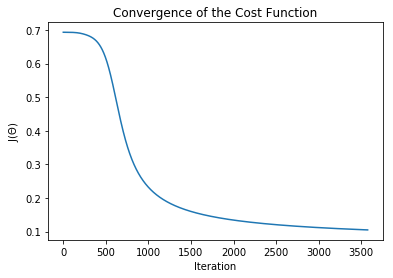

In [42]:
# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
# Train model
model.learn(X, y)

# Plot costs
plt.plot(model.costs)
plt.title("Convergence of the Cost Function")
plt.ylabel("J($\Theta$)")
plt.xlabel("Iteration")
plt.show()

In [47]:
X_train = X[:70]
y_train = y[:70]

X_test = X[-30:]
y_test = y[-30:]

In [48]:
from sklearn.metrics import roc_auc_score
# Set a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

# Initialize model 
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
model.learn(X_train,y_train)
predictions = model.predict(X_test)[0]
#print(predictions)
auc = roc_auc_score(y_test, predictions)
print(auc)

1.0
